In [1]:
#%% Import required packages
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.optimize import curve_fit
from PLfunctions import sample_name, find_nearest, weighted_PL, trim_data, exp_fit

In [3]:
chem = 'MAPbI2Br'
exp = '58min'
laser = '488nm'
power = '5mW'
OD = '1p5'
delay = 120 #time experiment is running before data 
lim1 = 550 #high energy cutoff
lim2 = 850 #low energy cutoff

In [123]:
path = r'MAPbI3_488nm_5mW_OD1p5_100ms 2020 July 30 13_13_05.csv' # use your path
all_files = sorted(glob.glob('MAPbI3_488nm_5mW_OD1p5_100ms 2020 July 30 13_13_05.csv'))
# all_files = sorted(glob.glob("08-02-2020 14_49_49 488nm_5mW_OD1p5_10ms_MAPBI5Br5_firsttwomin-Frame-10.csv"))

In [75]:
for x in range(len(all_files)):
    df = pd.read_csv(all_files[x], index_col=None, header=0) #read file
    current = round(x*interval,2) #assign time to file 
    temp = df.add_suffix(str(current)) #link time to file 
    fullset = pd.concat([fullset, temp[["Intensity"+str(current)]]], axis=1) #add intensity data to file
    time.append(current+delay) #save time

NameError: name 'interval' is not defined

In [126]:
df = pd.read_csv(all_files[x], index_col=None, header=0) #read file

In [127]:
wavelength=df['Wavelength']
intensity=df['Intensity']

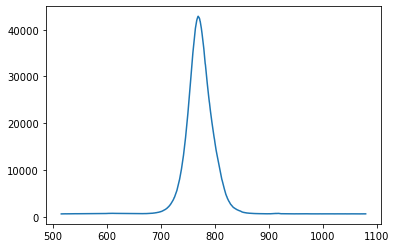

In [128]:
plt.plot(wavelength, intensity)

In [81]:
inten_weigh_avg = sum(intensity*wavelength)/sum(intensity)
inten_weigh_avg

720.3505932190756

In [115]:
inten_avg = sum(intensity)/len(intensity)
inten_avg

1674.7999559544805

In [61]:
def gaussian(x, height, center, width):
    return height*np.exp(-(x - center)**2/(2*width**2))

In [46]:
popt, pcov = curve_fit(gaussian, wavelength, intensity, [4000, 800, 50, 100])

In [47]:
pcov

array([[ 1.06363985e+04,  2.13765490e-06, -3.24926154e+00,
        -3.81984149e+02],
       [ 2.13765490e-06,  3.59562858e-03, -4.54561134e-06,
        -1.39835945e-08],
       [-3.24926154e+00, -4.54561134e-06,  3.87665134e-03,
        -3.89679258e-01],
       [-3.81984149e+02, -1.39835945e-08, -3.89679258e-01,
         5.40221102e+02]])

In [48]:
popt

array([3.96593255e+04, 7.71469957e+02, 2.02277576e+01, 7.87194525e+02])

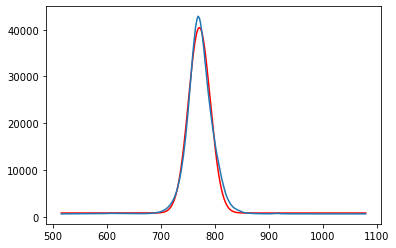

In [50]:
fig = plt.figure()
plt.plot(wavelength, gaussian(wavelength, 3.96593255e+04, 7.71469957e+02, 2.02277576e+01, 7.87194525e+02),'r')
plt.plot(wavelength, intensity)

In [100]:
def two_gaussians(x, h1, c1, w1, h2, c2, w2,a0):
        return (gaussian(x, h1, c1, w1) +
            gaussian(x, h2, c2, w2))+a0
    
def three_gaussians(x, h1, c1, w1, h2, c2, w2, h3, c3, w3,a0):
        return (gaussian(x, h1, c1, w1) +
            gaussian(x, h2, c2, w2)+ gaussian(x, h3, c3, w3))+a0

def _4gaussians(x, h1, c1, w1, h2, c2, w2, h3, c3, w3, h4, c4, w4,a0):
        return (gaussian(x, h1, c1, w1) + gaussian(x, h4, c4, w4)+
            gaussian(x, h2, c2, w2)+ gaussian(x, h3, c3, w3))+a0

In [147]:
popt, pcov = curve_fit(two_gaussians, wavelength, intensity, [4000, 700, 50, 4000, 700, 50,10])

In [148]:
pcov

array([[ 4.25678827e+03,  4.31707903e-01,  1.51791361e+00,
        -4.27722167e+03,  9.87006227e-01,  1.34868786e+00,
        -2.03400763e+01],
       [ 4.31707903e-01,  2.83339169e-04,  1.50091670e-04,
        -4.88078490e-01, -3.87434512e-05,  2.13150442e-04,
        -4.67760389e-03],
       [ 1.51791361e+00,  1.50091670e-04,  7.92765354e-04,
        -1.69237864e+00,  3.93402783e-04,  4.61778029e-04,
        -5.32582198e-03],
       [-4.27722167e+03, -4.88078490e-01, -1.69237864e+00,
         4.50982331e+03, -9.86486203e-01, -1.40834082e+00,
         1.57845168e+01],
       [ 9.87006227e-01, -3.87434512e-05,  3.93402783e-04,
        -9.86486203e-01,  4.15612773e-04,  2.65502988e-04,
        -2.90666344e-03],
       [ 1.34868786e+00,  2.13150442e-04,  4.61778029e-04,
        -1.40834082e+00,  2.65502988e-04,  5.63111867e-04,
        -1.49242367e-02],
       [-2.03400763e+01, -4.67760389e-03, -5.32582198e-03,
         1.57845168e+01, -2.90666344e-03, -1.49242367e-02,
         5.7769840

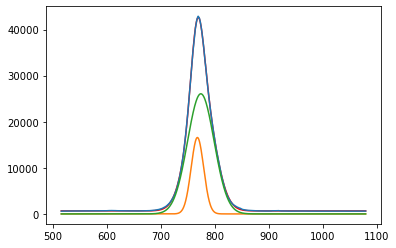

In [149]:
fig = plt.figure()
plt.plot(wavelength, two_gaussians(wavelength, *popt),'r')
plt.plot(wavelength, intensity)
plt.plot(wavelength, gaussian(wavelength, *popt[:3]))
plt.plot(wavelength, gaussian(wavelength, *popt[3:6]))

In [151]:
popt, pcov = curve_fit(three_gaussians, wavelength, intensity,\
                       [4000, 700, 50, 4000, 700, 50, 4000,\
                        700, 50, 10])

In [159]:
popt, pcov = curve_fit(_4gaussians, wavelength, intensity,\
                       [2000, 700, 50, 2000, 700, 50, 2000,\
                        700, 50, 2000, 700, 50, 10])

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 2800.

In [152]:
popt

array([2.58504524e+04, 7.74332886e+02, 2.45571658e+01, 1.59143650e+04,
       7.67627571e+02, 1.19247913e+01, 1.01982675e+03, 7.70273370e+02,
       6.84340900e+00, 6.56952780e+02])

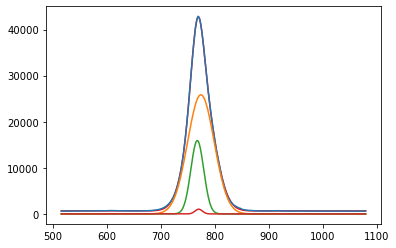

In [134]:
fig = plt.figure()
plt.plot(wavelength, three_gaussians(wavelength, *popt),'r')
plt.plot(wavelength, intensity)
plt.plot(wavelength, gaussian(wavelength, *popt[:3]))
plt.plot(wavelength, gaussian(wavelength, *popt[3:6]))
plt.plot(wavelength, gaussian(wavelength, *popt[6:9]))

In [25]:
fig = plt.figure()
plt.plot(wavelength, intensity,'b')
plt.plot(wavelength, _4gaussians(wavelength, *popt),'r--')
plt.plot(wavelength, gaussian(wavelength, *popt[:3]))
plt.plot(wavelength, gaussian(wavelength, *popt[3:6]))
plt.plot(wavelength, gaussian(wavelength, *popt[6:9]))
plt.plot(wavelength, gaussian(wavelength, *popt[9:12]))

NameError: name 'wavelength' is not defined

<Figure size 432x288 with 0 Axes>

In [219]:
from scipy import signal

In [221]:
print(signal.gaussian)

<function gaussian at 0x7fb9c438bae8>


In [255]:
files=sorted(glob.glob("2min/*.csv"))
# a=[print(each) for each in files]
# print(file)
files[0]

'2min/07-30-2020 13_26_20 MAPbI3_first_minutes 5-Frame-01.csv'

In [256]:
class PLspec:
    def __init__(self, file, Wmin=550, Wmax=1000):
        self.c = 2.99792458e8 * 1e9 #
        self.h = 4.1357e-15 #eV*s
        self.file = file
        self.og = pd.read_csv(self.file, index_col=None, header=0)
        self.df = self.og
        self.Wmin = Wmin
        self.Wmax = Wmax
        self.minCond = self.df["Wavelength"]>self.Wmin
        self.maxCond = self.df["Wavelength"]<self.Wmax
        self.formatData()
        
    def formatData(self):
        self.W = self.df["Wavelength"]
        self.I = self.df["Intensity"]
        self.E = self.c/self.W*self.h
        self.IweightedW = sum(self.I*self.W)/sum(self.I)
        self.IweightedE = sum(self.I*self.E)/sum(self.I)
        
    def plotW(self):
        plt.plot(self.W, self.I,'b')
        
    
    def plotE(self):
        plt.plot(self.E, self.I,'b')
        
        
    def retore(self):
        self.df = self.og 
        self.formatData()

        
    def narrow(self, Wmin=550, Wmax=1000):
        self.Wmin = Wmin
        self.Wmax = Wmax
        self.minCond = self.df["Wavelength"]>self.Wmin
        self.maxCond = self.df["Wavelength"]<self.Wmax
        self.df = self.df[self.minCond & self.maxCond]
        self.formatData()
        
    
    def gaussian(self, x, mu, sigma, height):
        return height*np.exp(-(x - mu)**2/(2*sigma**2))

        

In [257]:
mySpec=PLspec(files[0])
mySpec.IweightedW
# narrowed=mySpec.df["Wavelength"]>550
# mySpec.df[narrowed]
mySpec.df[mySpec.minCond]
mySpec.narrow()
mySpec.df

,ROI,Frame,Wavelength,Row,Column,Intensity
316,1,1,550.048676,0,316,634.337524
317,1,1,550.475227,0,317,633.187500
318,1,1,550.901768,0,318,634.049988
319,1,1,551.328300,0,319,633.637512
320,1,1,551.754823,0,320,633.424988
...,...,...,...,...,...,...
1335,1,1,978.880246,0,1335,623.700012
1336,1,1,979.294411,0,1336,626.137512
1337,1,1,979.708562,0,1337,624.200012
1338,1,1,980.122697,0,1338,625.450012


In [258]:
class PLevol:
    def __init__(self, folder):
        self.og = [PLspec(file) for file in sorted(glob.glob(folder+"/*.csv"))]
        self.PLs = self.og
        self.avgseries = [spec.IweightedW for spec in self.PLs]
        self.Eavgseries = [each.IweightedE for each in self.PLs]
        
    def restore(self):
        self.PLs = self.og 
        
    def narrow(self, Wmin=550, Wmax=1000):
        [PL.narrow(Wmin, Wmax) for PL in self.og]
        self.Wavgseries = [each.IweightedW for each in self.PLs]
        self.Eavgseries = [each.IweightedE for each in self.PLs]

In [259]:
IBr2 = PLevol("2min")
# IBr2.avgseries
IBr2.narrow(Wmin=400)

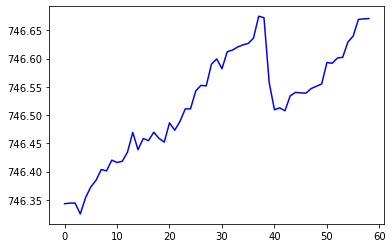

<Figure size 432x288 with 0 Axes>

In [261]:
fig = plt.figure()
plt.plot(IBr2.Wavgseries[1:],'b')
fig = plt.figure()

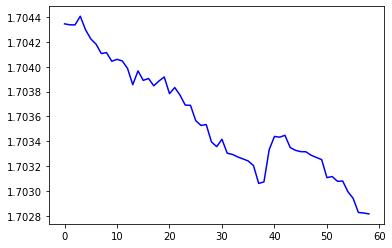

<Figure size 432x288 with 0 Axes>

In [260]:
fig = plt.figure()
plt.plot(IBr2.Eavgseries[1:],'b')
fig = plt.figure()

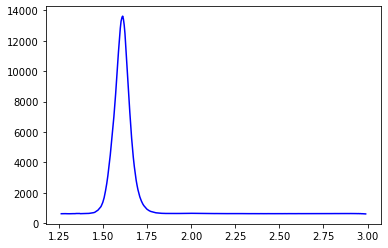

In [264]:
IBr2.PLs[1].plotE()

In [212]:
len(IBr2.PLs)

60